## Graded Challange 5

### Nama    : Ilmimada Hafiya
### Batch   : CODA-RMT-007

#### Program ini dibuat untuk menganalisa popularitas seblak di masyarakat, dengan menggunakan data dari data scrapping tokopedia
---

### i. import Library


In [23]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.stats import norm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

### ii. Load Data dan Eksplorasi Data Analisis

In [3]:
# load data
df = pd.read_csv('tokopedia_seblak_08072025.csv')

In [4]:
# lihat struktur data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Nama Produk   116 non-null    object 
 1   Harga Produk  116 non-null    float64
 2   Penjual       116 non-null    object 
 3   Kota          116 non-null    object 
 4   Terjual       116 non-null    float64
 5   Rating        116 non-null    float64
dtypes: float64(3), object(3)
memory usage: 5.6+ KB


In [5]:
# tampilkan 5 data teratas
df.head()

,Nama Produk,Harga Produk,Penjual,Kota,Terjual,Rating
0,Seblak Instan Paket 10pcs (10 Bungkus) Khas Ba...,25999.0,mamah mbi,Kab. Garut,100.0,4.5
1,Mama Fuji - SEBLAK INSTAN Food Noodles,26999.0,Mama Fuji Real,Tangerang,2000.0,4.8
2,Seblak Rafael/Seblak Coet Instan Halal,26600.0,Foodstocks,Jakarta Selatan,1000.0,4.9
3,Kylafood Seblak Rempah Autentik,13000.0,Kylafood Jakarta,Jakarta Selatan,250.0,5.0
4,SEBLAK CAMPUR - SEBLAK MIX 500gr ANEKA KERUPIK...,13450.0,Aneka Snack & Food,Kab.Ciamis,10000.0,4.7


In [6]:
# statistik ringkas
df.describe()

,Harga Produk,Terjual,Rating
count,116.000000,116.000000,116.000000
mean,31006.258621,5067.336207,4.667241
std,29277.362810,16482.935439,0.497782
min,2359.000000,2.000000,3.000000
25%,12375.000000,100.000000,4.700000
50%,21000.000000,500.000000,4.800000
75%,38600.000000,3000.000000,4.900000
max,169000.000000,100000.000000,5.000000


### iii. Business understanding

#### Konteks Bisnis
##### Saya ingin mulai berjualan tanpa modal produksi, sehingga memilih dropship. Karena seblak sedang viral, saya ingin tahu apakah produk seblak mempunyai potensi untuk dijual di tokopedia.
##### Tujuan analisa :
##### - Mengetahui apakah produk ini disukai
##### - berapa banyak pembeli
##### - berapa harga yang masuk akal untuk berjualan seblak

#### (SMART Framework)
|**SMART**|**Description**|
|---|---|
|Specific|Mengetahui apakah produk seblak memiliki potensi penjualan di Tokopedia |
|Measureable|menggunakan metrik: Rata-rata rating, jumlah terjual, distribusi harga, korelasi harga-rating |
|Achievable|Data sudah didapatkan dan dapat dianalisis dengan teknik statistik dasar |
|Relevant|berhubungan langsung dengan keputusan dropship |
|Time-bound|Analisis dilakukan untuk penjualan satubulan ke depan |

#### Problem Statement
##### Dalam waktu satu bulan, saya ingin mengetahui potensi penjualan produk seblak di Tokopedia berdasarkan data rating, harga, dan jumlah terjual, agar dapat memutuskan kelayakan seblak untuk dijual dengan skema dropship

### iv. Analisis Data

#### 1. Statistik Deskriptif

In [11]:
# Kolom numerik utama
cols = ['Harga Produk', 'Terjual', 'Rating']

for col in cols:
    print(f"=== {col.upper()} ===")
    print("Mean:", df[col].mean())
    print("Median:", df[col].median())
    print("Std Dev:", df[col].std())
    print("Skewness:", skew(df[col]))
    print("Kurtosis:", kurtosis(df[col]))
    print()

=== HARGA PRODUK ===
Mean: 31006.258620689656
Median: 21000.0
Std Dev: 29277.362809521623
Skewness: 2.107371779842613
Kurtosis: 5.2346240473901595

=== TERJUAL ===
Mean: 5067.336206896552
Median: 500.0
Std Dev: 16482.93543872833
Skewness: 5.168808163797627
Kurtosis: 26.444225091613898

=== RATING ===
Mean: 4.667241379310344
Median: 4.8
Std Dev: 0.49778218775562516
Skewness: -2.6861662799688846
Kurtosis: 6.174043500612827



#### Visualisasi grafik

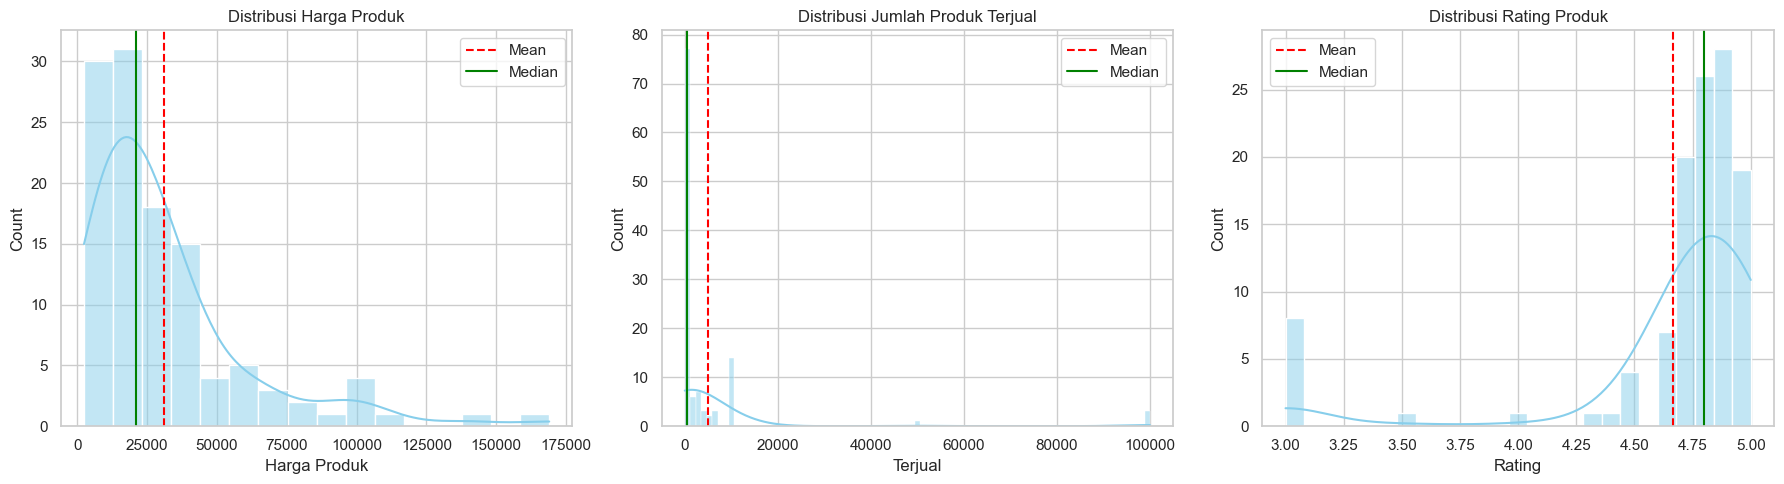

In [ ]:
sns.set(style="whitegrid")

# Setup subplot
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List kolom
cols = ['Harga Produk', 'Terjual', 'Rating']
titles = ['Distribusi Harga Produk', 'Distribusi Jumlah Produk Terjual', 'Distribusi Rating Produk']

# visualisasi
for i, col in enumerate(cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    axes[i].axvline(df[col].median(), color='green', linestyle='-', label='Median')
    axes[i].set_title(titles[i])
    axes[i].legend()

plt.tight_layout()
plt.show()

Analisis Distribusi dan Insight Produk Seblak

- Harga produk
    - Mean : Rp 31.006
    - Median : Rp 21.000
    - Skewness : 2.11 (positive)
    - Kurtosis : 5.23
- Interpretasi
    - Rata-rata harga > median = right skewed, ada banyak produk mahal yang menarik rata-rata ke atas
    - Kurtosis > 3 - distribusi leptokurtik, ada outlier harga tinggi (kemungkinan produk dengan harga yang jauh lebih mahal dari harga rata-rata)
    - Kesimpulan : produk seblak didominasi harga menengah ke bawah, tetapi ada beberapa outlier mahal yang membuat distribusi meluas ke kanan.

- Jumlah Produk Terjual
    - Mean : 5.067 produk/bulan (karena data scraping tidak ada time series, maka data diasumsikan sebagai penualan per-bulan)
    - Median : 500
    - Skewness: 5.17
    - Kurtosis: 26.44 (sangat tinggi)
- Interpretasi:
    - Median < mean = right skewed.
    - Banyak outlier, yaitu sedikit produk dengan jumlah terjual sangat besar (bisa jadi viral/best seller), tapi mayoritas produk hanya terjual dalam jumlah kecil atau menengah.
    - Kurtosis sangat tinggi = ada beberapa produk sangat dominan dalam penjualan, sisanya biasa saja.
    - Kesimpulan : lebih baik pilih produk dengan jumlah terjual tinggi, artinya udah terbukti laku.

- Rating
    - Mean: 4.67
    - Median: 4.8
    - Skewness: -2.69 (negatif)
    - Kurtosis: 6.17
- Interpretasi:
    - Skewness negatif = mayoritas rating tinggi (4.5 - 5).
    - Kurtosis > 3 = rating cenderung terkonsentrasi di sekitar 4.5-5, sedikit variasi.
    - Kesimpulan : produk seblak umumnya disukai konsumen, meskipun jumlah terjualnya tidak selalu tinggi.

##### Kesimpulan : Data menunjukkan sebagian besar produk seblak dijual dengan harga terjangkau (sekitar Rp 21.000), meskipun ada beberapa produk premium atau bundling yang harganya cukup mahal. jumlah terjual sangat bervariasi, namun mayoritas terjual dalam jumlah kecil. Rating penjualan menunjukkan konsumen puas dengan kualitas seblak yang terjual karena mayoritas rating hampir semua mendekati 5.0. Terdapat outlier di semua variable terutama penjualan, hal ini menunjukkan bahwa hanya sedikit produk yang bisa viral.

#### 2. Estimasi Pendapatan Min - Max (Confidence Interval)
Asumsi :

    - Pendapatan = harga produk x terjual

    - Produk Terjual = Penjualan per bulan

    - Diasumsikan sebagai distribusi normal

    - Convidence Level 95%



In [ ]:
# Buat kolom pendapatan
df['pendapatan'] = df['Harga Produk'] * df['Terjual']

# Hitung standar deviasi dan jumlah sampel
std = df['pendapatan'].std()
N = len(df)

# Hitung confidence interval 95%
low, up = stats.norm.interval(
    0.95,
    loc=df['pendapatan'].mean(),
    scale=std / np.sqrt(N)
)

# Tampilkan hasil
print('Lower Limit:', round(low, 2))
print('Upper Limit:', round(up, 2))

Lower Limit: 50424732.92
Upper Limit: 172819572.08


Berdasarkan hasil perhitungan dengan confidence level 95%, estimasi pendapatan penjualan seblak di tokopedia berapa pada rentang 50 juta hingga 172 juta.

#### 3. Analisa harga barang di Jabodetabek dan luar Jabodetabek

In [19]:
df['Kota'].unique()

array(['Kab. Garut', 'Tangerang', 'Jakarta Selatan', 'Kab.Ciamis',
       'Semarang', 'Kab. Tangerang', 'Jakarta Pusat', 'Bandung',
       'Kab. Bandung', 'Jakarta Barat', 'Surabaya', 'Tangerang Selatan',
       'Jakarta Timur', 'Depok', 'Jakarta Utara', 'Kab. Karawang',
       'Kab. Cirebon', 'Cimahi', 'Bekasi', 'Tasikmalaya', 'Kab. Bekasi',
       'Kab. Bandung Barat', 'Kab. Tasikmalaya', 'Kab. Cilacap',
       'Kab. Bogor', 'Kab. Gresik'], dtype=object)

##### Uji hipotesis
- H0 (null) : Tidak ada perbedaan harga rata-rata produk seblak di Jabodetabek dan luar Jabodetabek
- H1 (Alternatif) : Ada perbedaan harga rata-rata produk seblak di Jabodetabek dan luar Jabodetabek

Two-Sampe Independent test

In [20]:
# Mengelompokkan wilayah Jabodetabek
wilayah_jabodetabek = [
    'Jakarta Selatan', 'Jakarta Pusat', 'Jakarta Timur', 'Jakarta Utara', 'Jakarta Barat', 
    'Tangerang', 'Tangerang Selatan', 'Kab. Tangerang', 'Depok', 'Kab.Bogor', 'Bekasi', 'Kab. Bekasi'
]

# Pisahkan dua grup data
harga_jabodetabek = df[df['Kota'].isin(wilayah_jabodetabek)]['Harga Produk']
harga_luar = df[~df['Kota'].isin(wilayah_jabodetabek)]['Harga Produk']

In [ ]:
# T test
stat, p = ttest_ind(harga_jabodetabek, harga_luar, nan_policy='omit', equal_var=False)

# Step 4: Print hasil
print("Statistik t:", stat)
print("P-value:", p)

Statistik t: -1.9824526248669765
P-value: 0.049912022338339544


P value lebih kecil dari 0.05, maka tolak H0 (tidak ada perbedaan harga), sehingga kesimpulannya ada lah terdapat perbedaan harga yang signifikan antara Jabodetabek dan luar Jabodetabek.

#### 4. Apakah harga murah lebih disukai konsumen?

In [25]:
# Korelasi harga dan rating
corr_rating, p_rating = spearmanr(df['Harga Produk'], df['Rating'], nan_policy='omit')

print("=== Korelasi Harga vs Rating ===")
print("Spearman Correlation:", round(corr_rating, 4))
print("P-Value:", round(p_rating, 4))

=== Korelasi Harga vs Rating ===
Spearman Correlation: 0.0518
P-Value: 0.5808


In [26]:
# Korelasi harga dan jumlah terjual
corr_terjual, p_terjual = spearmanr(df['Harga Produk'], df['Terjual'], nan_policy='omit')

print("\n=== Korelasi Harga vs Terjual ===")
print("Spearman Correlation:", round(corr_terjual, 4))
print("P-Value:", round(p_terjual, 4))


=== Korelasi Harga vs Terjual ===
Spearman Correlation: -0.1361
P-Value: 0.1452


### Kesimpulan Akhir

Berdasarkan analisis data produk seblak di Tokopedia, ditemukan hasil analisa data berikut :

- **Distribusi Data:**
  - Harga produk mayoritas ada di kisaran menengah (median Rp21.000), dengan sedikit produk premium sebagai outlier (produk dengan harga sangat tinggi).
  - Jumlah penjualan sangat bervariasi; sebagian besar produk hanya terjual sedikit kemungkinan produk baru dijual, namun ada beberapa yang sangat laku kemungkinan dari produk yang viral.
  - Rating produk umumnya tinggi (median 4.8), menunjukkan kepuasan konsumen yang konsisten.

- **Estimasi Pendapatan:**
  - Confidence interval 95% menunjukkan potensi pendapatan per produk berkisar antara **Rp50 juta hingga Rp173 juta per bulan**.

- **Perbedaan Harga Berdasarkan Wilayah:**
  - Terdapat **perbedaan harga yang signifikan** antara produk di wilayah Jabodetabek dan luar Jabodetabek (*p-value = 0.049*), kemungkinan disebabkan oleh faktor biaya bahan baku.

- **Pengaruh Harga terhadap Rating dan Penjualan:**
  - Tidak ditemukan korelasi signifikan antara harga dengan rating (*p = 0.58*) maupun dengan jumlah produk terjual (*p = 0.14*). Artinya, **harga bukan faktor utama** yang mempengaruhi keputusan pembelian.

  ---
- Dengan demikian, dropship seblak menunjukkan peluang penghasilan yang tinggi, untuk meningkatkan penjualan, disarankan memilih seblak dengan **rating tinggi** dan **histori penjualan tinggi**.
- Selain itu, wilayah penjualan produk seblak juga harus dipertimbangkan karena memiliki margin yag besar dan ketersediaan produk yang melimpah.
